In [1]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pymysql
import pandas as pd
from datetime import datetime

In [16]:
conn = pymysql.connect(
    user='my_srv',              # 유저 이름
    passwd='wkrldi@duqhdi12',   # 패스워드
    host='125.141.223.156',     # 호스트
    db='m_yeoboya_ai_dv',             # 데이터베이스
    charset='utf8',             # 인코딩
    port=33141                  # 포트 번호(''없이 사용)
)


cursor = conn.cursor(pymysql.cursors.DictCursor)
sql = "select * from m_yeoboya.member_mate" 
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
mate_df = pd.DataFrame(result) # 데이터 프레임으로 변환환
mate_df.head(3)

,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mate_slct_yn,mem_name_slct,...,family_conts_upd_cnt,secret_item_yn,secret_yn,respect_person_cont,my_point_cont,list_prt_yn,my_hd_item_yn,my_hd_yn,ins_date,upd_date
0,5,m,q,qnz,1977,1,9,w,y,y,...,13,y,y,,90,y,n,n,2015-07-22 16:31:35,2022-06-10 16:48:48
1,1804864,m,o,o10,1993,2,1,w,y,y,...,1,n,n,,80,y,n,n,2022-03-19 18:07:23,2022-06-06 19:12:05
2,2,m,e,e05,1971,1,3,r,y,y,...,2,n,n,,50,y,n,n,2015-07-22 16:37:25,2021-11-04 06:21:51


In [5]:
cursor = conn.cursor(pymysql.cursors.DictCursor)
sql = "select * from m_yeoboya.member_basic" 
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
basic_df = pd.DataFrame(result) # 데이터 프레임으로 변환환
basic_df.head(3)

,mem_no,mem_id,mem_passwd,mem_passwd_v1,mem_passwd_v2,passwd_tmp_yn,mem_nick,mem_nick_yn,mem_sex,mem_birth_year,...,mate_reg_yn,mem_slct,matchmk_mem_no,matchmk_conts,smtp_slct,smtp_id,app_ver,phone_ver,mem_chnl,upd_date
0,2,ag315@gmail.com,*EE8B70CCF4C155606422917955B852444BB120A9,d8f93948f3d3c283102c19e6db44356451b9985540178e...,,n,디노킹,y,m,1971,...,y,b,0,,b,BD31B3FA-7EE3-4739-A2BB-23B3D1A8BDC3,6.6.103,15.4.1,501,2015-07-22 16:21:21
1,5,dntn20@naver.com,*9CC98632AA58449C1C67E7A30BDC3647BFAA6293,f8dc94048d37ead74a70a0a94bdbc9e3fcdec63258c5c9...,,n,바쉐린,n,m,1977,...,y,b,0,,b,c16a8b0029801ff1,6.6.111,15.5,501,2015-07-22 16:25:49
2,57,baroom@naver.com,*BE52216085D67EE7619B0D23D61C04D14FBA8922,7c07727cb559b31f69ee693a92e4eeada400f13bc370cd...,,n,허니버터,y,m,1977,...,y,b,0,,a,b59e1c528cfb2268,1.5.311,12,501,2015-07-27 09:03:18


In [6]:
cursor = conn.cursor(pymysql.cursors.DictCursor)
sql = "select * from m_yeoboya.member_pf_view_all_log where ins_date between '2022-06-15' and '2022-06-16'" 
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
view_df = pd.DataFrame(result) # 데이터 프레임으로 변환환
view_df.head(3)

,auto_no,mem_no,mem_sex,ptr_mem_no,ptr_mem_sex,ptr_rprsn_photo_yn,open_slct,open_date,open_type,item_cnt,ins_date
0,336746706,1869104,f,1718324,m,n,f,2022-06-15 00:00:00,0,0,2022-06-15 00:00:00
1,336746707,1732899,m,696743,f,n,v,2022-06-15 00:00:04,0,0,2022-06-15 00:00:04
2,336746708,1865444,m,1709282,f,n,v,2022-06-15 00:00:04,0,0,2022-06-15 00:00:04


In [7]:
# 1개만 카운트하기 위해 중복 회원 쌍 제거, member_mate에 있는 회원만 사용
view_df.drop_duplicates(inplace=True, subset=['mem_no','ptr_mem_no'])
view_df.reset_index(drop=True,inplace=True)
view_df = view_df[view_df['mem_no'].isin(mate_df['mem_no'].values)]
view_df = view_df[view_df['ptr_mem_no'].isin(mate_df['mem_no'].values)]
print(len(view_df))

190430


In [8]:
# member_msg_log_back
cursor = conn.cursor(pymysql.cursors.DictCursor)
sql = "select * from m_yeoboya.member_msg_log_back where ins_date between '2022-06-15' and '2022-06-16'" 
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
msg_df = pd.DataFrame(result) # 데이터 프레임으로 변환환
msg_df.head(3)

,auto_no,mem_no,mem_sex,mem_birth_year,mate_slct,login_media,mem_slct,ptr_mem_no,ptr_mem_sex,ptr_mem_birth_year,ptr_mate_slct,ptr_login_media,read_yn,msg_type,msg_slct,msg_cont,msg_etc,file_name,file_size,ins_date
0,208190372,1662104,m,1983,r,s,o,1864655,f,1980,r,s,n,1,0,안녕하세요,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-06-15
1,208190374,1866328,m,1976,r,s,o,1858724,f,1986,r,,n,1,0,안녕하세요,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-06-15
2,208190376,161666,m,1970,r,s,b,1869527,f,1973,r,s,n,1,0,저도 같은마음인걸요,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-06-15


In [9]:
# 1개만 카운트하기 위해 중복 회원 쌍 제거, member_mate에 있는 회원만 사용
msg_df.drop_duplicates(inplace=True, subset=['mem_no','ptr_mem_no'])
msg_df = msg_df[msg_df['mem_no'].isin(mate_df['mem_no'].values)]
msg_df = msg_df[msg_df['ptr_mem_no'].isin(mate_df['mem_no'].values)]
msg_df.reset_index(drop=True,inplace=True)
len(msg_df)

30878

In [17]:
# age 연산
mate_df['age'] = int(str(datetime.today())[:4]) - mate_df['mem_birth_year']
df = mate_df[['mem_no','mem_sex','age']]

In [18]:
# x가 열람한 회원 리스트
df['view_list'] = None
for i in tqdm(range(len(df))) :
    view_list = view_df[view_df['mem_no']==df.loc[i, 'mem_no']]['ptr_mem_no'].values.tolist()
    df.loc[i, 'view_list'] = [[view_list]]
    
df['view_list'] = df['view_list'].apply(lambda x : x[0])
df['view_count'] = df['view_list'].apply(lambda x : len(x)) # 총 열람 횟수

# x를 열람한 회원 리스트
df['viewed_list'] = None
for i in tqdm(range(len(df))) :
    viewed_list = view_df[view_df['ptr_mem_no']==df.loc[i, 'mem_no']]['mem_no'].values.tolist()
    df.loc[i, 'viewed_list'] = [[viewed_list]]
    
df['viewed_list'] = df['viewed_list'].apply(lambda x : x[0])
df['viewed_count'] = df['viewed_list'].apply(lambda x : len(x)) # 총 열람된 횟수

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 124286/124286 [17:42<00:00, 116.93it/s]


In [19]:
# 메시지 발신 회원 리스트
df['send_list'] = None
for i in tqdm(range(len(df))) :
    send_list = msg_df[msg_df['mem_no']==df.loc[i, 'mem_no']]['ptr_mem_no'].values.tolist()
    df.loc[i, 'send_list'] = [[send_list]]

df['send_list'] = df['send_list'].apply(lambda x : x[0])
df['send_count'] = df['send_list'].apply(lambda x : len(x)) # 총 발신 수 

    
# 메시지 수신 회원 리스트
df['sent_list'] = None
for i in tqdm(range(len(df))) :
    sent_list = msg_df[msg_df['ptr_mem_no']==df.loc[i, 'mem_no']]['mem_no'].values.tolist()
    df.loc[i, 'sent_list'] = [[sent_list]]
    
df['sent_list'] = df['sent_list'].apply(lambda x : x[0])    
df['sent_count'] = df['sent_list'].apply(lambda x : len(x)) # 총 수신 수

print(len(df))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 124286/124286 [18:19<00:00, 113.03it/s]


124286


In [20]:
career_key = {0 : 1, 1: 1, 2: 1, 3 : 3, 4: 4, 5: 4, 6 : 2,7 : 2, 8 : 2, 9 : 4, 10 : 4, 11 : 4, 12 : 2}
salary_key = {1 : 1,2 : 1,3: 1,4 : 2,5: 2,6 : 3,7 : 3,8 : 3, 9 : 3,10 : 4, 13 : 5, 14 : 6,15 : 7,16 :7, 17:7, 12 : 1}
possess_key = {'b' : 1, 'c' : 1, 'd' : 1, 'e' : 2, 'f' : 3, 'g' : 4, 'h' : 5 ,'m' : 6, 'i' : 7,'j' : 7, 'k' : 7, 'l' : 7, 'n' : 7}


def career_code(c) :
    if str(c).isdecimal() and int(c) in career_key.keys():
        result = career_key[int(c)]
    else :
        result = 3
    return result

def salary_code(sal) :
    if str(sal).isdecimal() and int(sal) in salary_key.keys() :
        result = salary_key[int(sal)]
    else :
        result = 1
    return result

def pos_code(pos) :
    if str(pos).isalpha() and pos in possess_key.keys() :
        result = possess_key[pos]
    else :
        result = 1
    return result

In [21]:
mate_df['mate_career'] = mate_df['mate_career'].apply(career_code)
mate_df['mate_ann_salary'] = mate_df['mate_ann_salary'].apply(salary_code)
mate_df['possess_property'] = mate_df['possess_property'].apply(pos_code)
mate_df[['mem_no','mem_loc','mate_slct','upd_cnt','photo_cnt', 'mate_career', 'mate_ann_salary', 'possess_property', 'conts_upd_cnt']]

,mem_no,mem_loc,mate_slct,upd_cnt,photo_cnt,mate_career,mate_ann_salary,possess_property,conts_upd_cnt
0,5,q,w,142,0,4,3,3,20
1,1804864,o,w,5,2,1,2,1,0
2,2,e,r,24,0,3,3,1,0
3,57,e,r,39,0,3,3,2,0
4,211,e,r,101,0,4,2,1,7
...,...,...,...,...,...,...,...,...,...
124281,1870109,b,w,3,1,1,1,1,0
124282,1868293,l,r,1,1,1,1,1,0
124283,1868286,b,w,1,1,2,1,1,0
124284,1868555,a,r,6,0,1,1,1,3


In [22]:
temp = pd.merge(df.drop(['send_list','sent_list','view_list','viewed_list'],axis=1), mate_df[['mem_no','mem_loc','mate_slct','upd_cnt','photo_cnt', 'mate_career', 'mate_ann_salary', 'possess_property', 'conts_upd_cnt']])
data = pd.merge(temp, basic_df[['mem_no','join_cnt','login_cnt','tot_stay_time']])
data.head()

,mem_no,mem_sex,age,view_count,viewed_count,send_count,sent_count,mem_loc,mate_slct,upd_cnt,photo_cnt,mate_career,mate_ann_salary,possess_property,conts_upd_cnt,join_cnt,login_cnt,tot_stay_time
0,5,m,45,0,0,0,0,q,w,142,0,4,3,3,20,0,8360,4905346
1,1804864,m,29,0,0,0,0,o,w,5,2,1,2,1,0,0,59,2668
2,2,m,51,0,0,0,0,e,r,24,0,3,3,1,0,0,3477,960696
3,57,m,45,0,0,0,0,e,r,39,0,3,3,2,0,0,1083,4846589
4,211,m,56,4,0,0,0,e,r,101,0,4,2,1,7,0,32840,5788702


In [23]:
ptr_data = data.copy()
ptr_data.columns = ['ptr_' + i for i in ptr_data.columns]
ptr_data.head()

,ptr_mem_no,ptr_mem_sex,ptr_age,ptr_view_count,ptr_viewed_count,ptr_send_count,ptr_sent_count,ptr_mem_loc,ptr_mate_slct,ptr_upd_cnt,ptr_photo_cnt,ptr_mate_career,ptr_mate_ann_salary,ptr_possess_property,ptr_conts_upd_cnt,ptr_join_cnt,ptr_login_cnt,ptr_tot_stay_time
0,5,m,45,0,0,0,0,q,w,142,0,4,3,3,20,0,8360,4905346
1,1804864,m,29,0,0,0,0,o,w,5,2,1,2,1,0,0,59,2668
2,2,m,51,0,0,0,0,e,r,24,0,3,3,1,0,0,3477,960696
3,57,m,45,0,0,0,0,e,r,39,0,3,3,2,0,0,1083,4846589
4,211,m,56,4,0,0,0,e,r,101,0,4,2,1,7,0,32840,5788702


---

In [24]:
# 긍정 응답 메시지 찾기
bi_temp = pd.DataFrame()
cnt = 0
temp = msg_df.copy()[['mem_no', 'ptr_mem_no']]
temp2 = temp.rename(columns={'mem_no' : 'ptr_mem_no', 'ptr_mem_no' : 'mem_no'})
for i in tqdm(range(len(temp))) :
    t = temp[(temp['mem_no']==temp2.loc[i, 'mem_no']) & (temp['ptr_mem_no']==temp2.loc[i, 'ptr_mem_no'])]
    if len(t) >= 1 :
        cnt += 1
        bi_temp = pd.concat([bi_temp, t])
        
print(cnt)
    
bi_temp['response_positive'] = 1

temp = temp.drop(bi_temp.index)
temp['response_positive'] = 0


rp = pd.concat([bi_temp, temp])
rp['response_positive'].value_counts()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30878/30878 [00:34<00:00, 905.91it/s]

7700


0    23178
1     7700
Name: response_positive, dtype: int64

In [25]:
temp = pd.merge(rp, data)
df = pd.merge(temp, ptr_data)
# df.head()

In [26]:
pr_df_female = df[df['mem_sex']=='f']
pr_df_female.columns = [i.replace('ptr_','') if 'ptr_' in i or i == 'response_positive' else 'ptr_' + i for i in pr_df_female.columns]
pr_df_male = df[df['mem_sex']=='m']

df = pd.concat([pr_df_male, pr_df_female])
df.head()

,mem_no,ptr_mem_no,response_positive,mem_sex,age,view_count,viewed_count,send_count,sent_count,mem_loc,...,ptr_mate_slct,ptr_upd_cnt,ptr_photo_cnt,ptr_mate_career,ptr_mate_ann_salary,ptr_possess_property,ptr_conts_upd_cnt,ptr_join_cnt,ptr_login_cnt,ptr_tot_stay_time
9,1457759,1755105,1,m,51,32,7,12,3,b,...,r,13,1,1,1,1,5,1,886,83955
10,1638078,1755105,0,m,54,45,16,42,6,p,...,r,13,1,1,1,1,5,1,886,83955
11,1855931,1755105,0,m,53,44,8,11,4,b,...,r,13,1,1,1,1,5,1,886,83955
12,1457759,1539328,1,m,51,32,7,12,3,b,...,r,10,4,3,2,2,3,0,490,72789
13,1850816,1539328,1,m,53,27,7,3,1,i,...,r,10,4,3,2,2,3,0,490,72789


In [27]:
df = df.drop(['mem_no','ptr_mem_no','mem_sex','ptr_mem_sex'], axis =1)
df['age_gap'] = (df['age'] - df['ptr_age'])

In [28]:
df['loc_like'] = df.apply(lambda x : 1 if x['mem_loc']==x['ptr_mem_loc'] else 0,axis=1)
df['marriage_like'] = df.apply(lambda x : 1 if x['mate_slct']==x['ptr_mate_slct'] else 0,axis=1)
df.drop(['mem_loc','mate_slct','ptr_mem_loc','ptr_mate_slct'],axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30878 entries, 9 to 30875
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   response_positive     30878 non-null  int64
 1   age                   30878 non-null  int64
 2   view_count            30878 non-null  int64
 3   viewed_count          30878 non-null  int64
 4   send_count            30878 non-null  int64
 5   sent_count            30878 non-null  int64
 6   upd_cnt               30878 non-null  int64
 7   photo_cnt             30878 non-null  int64
 8   mate_career           30878 non-null  int64
 9   mate_ann_salary       30878 non-null  int64
 10  possess_property      30878 non-null  int64
 11  conts_upd_cnt         30878 non-null  int64
 12  join_cnt              30878 non-null  int64
 13  login_cnt             30878 non-null  int64
 14  tot_stay_time         30878 non-null  int64
 15  ptr_age               30878 non-null  int64
 16  ptr_

---

## Feature Selection

In [81]:
X = df.drop(['response_positive'], axis=1)
y = df['response_positive']

In [82]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)
print('Oversampled dataset result :', Counter(y_res))

Oversampled dataset result : Counter({1: 23178, 0: 23178})


In [83]:
# X = X.drop(model.pvalues[model.pvalues >= 0.05].index.tolist(), axis=1)

(37084, 31) (9272, 31) (37084,) (9272,)


In [99]:
from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import RandomForestClassifier
boost = CatBoostClassifier(random_state=0, silent=True)

boost.fit(X_res, y_res)
# boost.feature_importances_

select_from_mod = SelectFromModel(boost, threshold='median',prefit=True)

selected_features = select_from_mod.transform(X_res)
print(selected_features.shape[1])

16


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37084, 31) (9272, 31) (37084,) (9272,)


In [101]:
pred = boost.predict(X_test)
pred_proba = boost.predict_proba(X_test)

from sklearn.metrics import auc, f1_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test, pred_proba[:, 1])
print(f'AUC Score : {auc(fpr,tpr):.3f}')

# f1_score(y_test, pred)
print(f'f1 score : {f1_score(y_test, pred):.3f}')

AUC Score : 0.991
f1 score : 0.958


In [78]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      response_positive   R-squared (uncentered):                   0.321
Model:                            OLS   Adj. R-squared (uncentered):              0.320
Method:                 Least Squares   F-statistic:                              507.2
Date:                Mon, 20 Jun 2022   Prob (F-statistic):                        0.00
Time:                        09:11:45   Log-Likelihood:                         -13113.
No. Observations:               24702   AIC:                                  2.627e+04
Df Residuals:                   24679   BIC:                                  2.646e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
view_count              -0.0001    5.7e-05     -2.228      0.026      -0.000   -1.53e-05
viewed_count            -0.0015   8.48e-05    -17.387      0.000      -0.002      -0.001
send_count              -0.0017   6.66e-05    -25.582      0.000      -0.002      -0.002
sent_count               0.0178      0.001     27.142      0.000       0.016       0.019
photo_cnt                0.0012      0.001      2.437      0.015       0.000       0.002
mate_career              0.0129      0.001      9.013      0.000       0.010       0.016
mate_ann_salary          0.0129      0.001      9.013      0.000       0.010       0.016
possess_property         0.0089      0.002      4.987      0.000       0.005       0.012
conts_upd_cnt           -0.0001   7.04e-05     -2.039      0.041      -0.000   -5.53e-06
tot_stay_time        -5.014e-09    1.8e-09     -2.781      0.005   -8.55e-09   -1.48e-09
ptr_age                  0.0038      0.000     17.714      0.000       0.003       0.004
ptr_view_count           0.0019      0.000     13.931      0.000       0.002       0.002
ptr_viewed_count     -7.731e-05   1.84e-05     -4.197      0.000      -0.000   -4.12e-05
ptr_sent_count          -0.0011      0.000     -5.311      0.000      -0.001      -0.001
ptr_upd_cnt          -3.617e-05   8.85e-06     -4.087      0.000   -5.35e-05   -1.88e-05
ptr_photo_cnt            0.0030      0.001      4.569      0.000       0.002       0.004
ptr_possess_property    -0.0191      0.002     -8.125      0.000      -0.024      -0.014
ptr_conts_upd_cnt        0.0006      0.000      3.968      0.000       0.000       0.001
ptr_join_cnt             0.0098      0.001      9.994      0.000       0.008       0.012
ptr_login_cnt         1.578e-05   2.39e-06      6.602      0.000    1.11e-05    2.05e-05
ptr_tot_stay_time     1.885e-08   9.25e-09      2.038      0.042    7.23e-10     3.7e-08
age_gap                 -0.0045      0.001     -8.122      0.000      -0.006      -0.003
loc_like                 0.0148      0.005      2.709      0.007       0.004       0.025
marriage_like            0.0278      0.006      4.523      0.000       0.016       0.040
==============================================================================
Omnibus:                     3413.064   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4026.432
Skew:                           0.945   Prob(JB):                         0.00
Kurtosis:                       2.418   Cond. No.                     3.00e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] 

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 다중공선성 check

In [79]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(random_state=77, silent=True )
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)

from sklearn.metrics import auc, f1_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test, pred_proba[:, 1])
print(f'AUC Score : {auc(fpr,tpr):.3f}')

f1_score(y_test, pred)
print(f'f1 score : {f1_score(y_test, pred):.3f}')

AUC Score : 0.924
f1 score : 0.709


## 1. 전진선택법(forward selection)

In [43]:
features = X_train.columns.tolist()
y = y_train

In [46]:
selected_features = []

threshold = 0.05

selected_feature_per_step = []
adjusted_r_squared_list = []

steps = []
step = 0


while len(features) > 0 :
    remainder = list(set(features) - set(selected_features))
    p_val = pd.Series(index=remainder)
    
    for col in remainder :
        X = X_train[selected_features+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit(disp=0)
        p_val[col] = model.pvalues[col]
    min_p_val = p_val.min()
    if min_p_val < threshold :
        selected_features.append(p_val.idxmin())
        
        while len(selected_features) > 0 :
            selected_X = X_train[selected_features]
            selected_X = sm.add_constant(selected_X)
            selected_p_val = sm.OLS(y, selected_X).fit(disp=0).pvalues[1:]
            max_p_val = selected_p_val.max()
            
            if max_p_val >= threshold :
                remove_feature = selected_p_val.idxmax()
                selected_features.remove(remove_feature)
            else :
                break
        
        step += 1
        steps.append(step)
        
        adjusted_r_squared = sm.OLS(y, sm.add_constant(X_train[selected_features])).fit(disp=0).rsquared_adj
        adjusted_r_squared_list.append(adjusted_r_squared)
        
        selected_feature_per_step.append(selected_features.copy())
        
    else :
        break

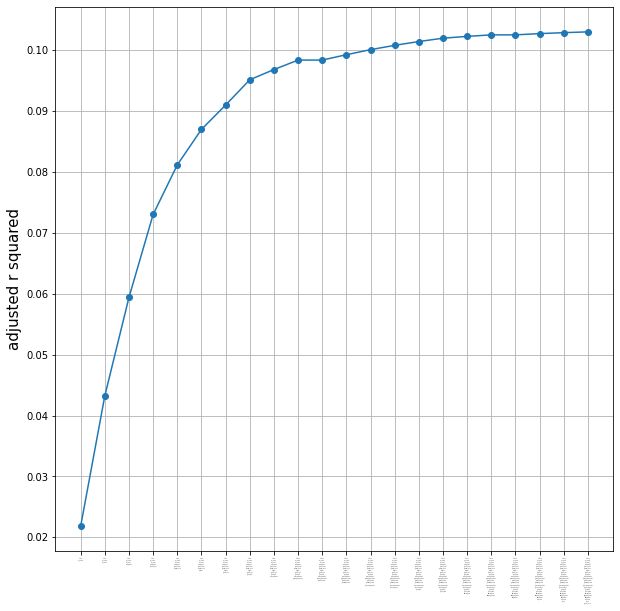

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')

font_size = 15

plt.xticks(steps, [f'step {s} \n'+'\n'.join(selected_feature_per_step[i]) for i,s in enumerate(steps)], fontsize=1)
plt.plot(steps, adjusted_r_squared_list, marker='o')

plt.ylabel('adjusted r squared', fontsize=font_size)
plt.grid(True)
plt.show()

- 데이터 불균형 안맞춰주고 돌렸더니 r2 score 개 쓰레기로 나옴. - 분류모델이라


---

In [ ]:
X = df.drop(['response_positive'], axis=1)
y = df['response_positive']

In [48]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)
print('Oversampled dataset result :', Counter(y_res))

Oversampled dataset result : Counter({0: 18512, 1: 18512})


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=7, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25916, 24) (11108, 24) (25916,) (11108,)


In [56]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      response_positive   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     234.9
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:05:40   Log-Likelihood:                -16550.
No. Observations:               25916   AIC:                         3.314e+04
Df Residuals:                   25894   BIC:                         3.332e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7715      0.012     63.745      0.000       0.748       0.795
send_count              -0.0026   7.98e-05    -32.642      0.000      -0.003      -0.002
sent_count               0.0237      0.001     34.484      0.000       0.022       0.025
viewed_count            -0.0019   9.82e-05    -18.855      0.000      -0.002      -0.002
ptr_sent_count          -0.0019      0.000     -7.868      0.000      -0.002      -0.001
ptr_view_count           0.0025      0.000     15.824      0.000       0.002       0.003
age_gap                 -0.0110      0.001    -16.178      0.000      -0.012      -0.010
ptr_login_cnt         1.507e-05   1.86e-06      8.094      0.000    1.14e-05    1.87e-05
ptr_join_cnt             0.0067      0.001      6.277      0.000       0.005       0.009
possess_property         0.0109      0.002      5.640      0.000       0.007       0.015
ptr_mate_ann_salary     -0.0314      0.002    -18.924      0.000      -0.035      -0.028
ptr_mate_career         -0.0314      0.002    -18.924      0.000      -0.035      -0.028
ptr_viewed_count        -0.0001   2.18e-05     -4.877      0.000      -0.000   -6.36e-05
ptr_possess_property    -0.0319      0.003    -11.424      0.000      -0.037      -0.026
ptr_conts_upd_cnt        0.0012      0.000      5.986      0.000       0.001       0.002
ptr_upd_cnt          -8.161e-05   2.23e-05     -3.666      0.000      -0.000    -3.8e-05
tot_stay_time        -1.151e-08   2.16e-09     -5.324      0.000   -1.57e-08   -7.27e-09
marriage_like           -0.0736      0.006    -11.427      0.000      -0.086      -0.061
mate_ann_salary         -0.0023      0.002     -1.371      0.170      -0.006       0.001
mate_career             -0.0023      0.002     -1.371      0.170      -0.006       0.001
view_count              -0.0002   6.64e-05     -2.321      0.020      -0.000    -2.4e-05
join_cnt                 0.0011      0.001      1.076      0.282      -0.001       0.003
ptr_send_count          -0.0005      0.000     -4.750      0.000      -0.001      -0.000
conts_upd_cnt        -1.591e-05   7.75e-05     -0.205      0.837      -0.000       0.000
==============================================================================
Omnibus:                   203475.456   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2228.998
Skew:                          -0.079   Prob(JB):                         0.00
Kurtosis:                       1.572   Cond. No.                     1.09e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.66e-28. This might indicate that there are
strong multicollinearity probl

In [62]:
X = df.drop(['response_positive', 'ptr_mate_career', 'conts_upd_cnt','mate_ann_salary','mate_career','join_cnt'], axis=1)
y = df['response_positive']

In [63]:
## 전진 단계별 선택법

# feature 및 target
variables = X_train.columns.tolist() 
y = y_train 

# 선택된 변수들 list 생성
forward_valriables = []

# 전진선택시 P 값을 고려할 때, 선택과 제거 임계치 설정    
sl_enter = 0.05
sl_remove = 0.05

# 각 스텝별로 선택된 변수들
sv_per_step = [] 
# 각 스텝별 수정된 결정계수
adj_r_squared_list = []
# 스텝
steps = []
step = 0


while len(variables) > 0:
    remainder = list(set(variables) - set(forward_valriables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[forward_valriables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit(disp=0)
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        forward_valriables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(forward_valriables) > 0:
            selected_X = X_train[forward_valriables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                forward_valriables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X_train[forward_valriables])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(forward_valriables.copy())
    else:
        break
# 출처: https://signature95.tistory.com/19?category=986931 [DataAnalyst:티스토리]

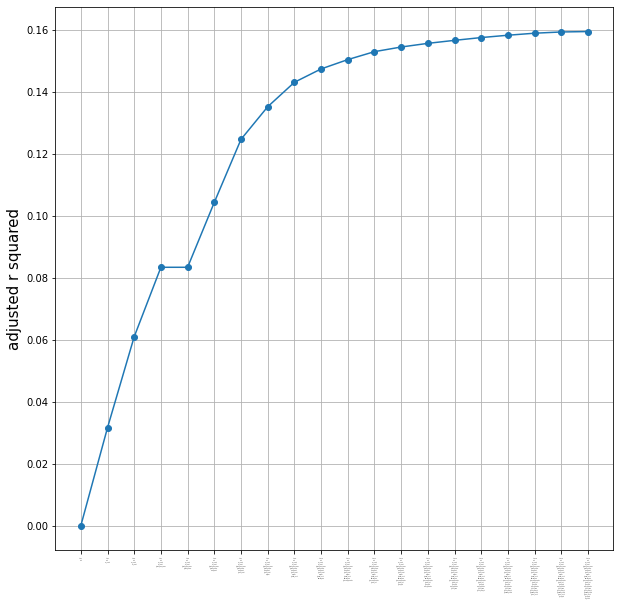

In [64]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')

font_size = 15

plt.xticks(steps, [f'step {s} \n'+'\n'.join(selected_feature_per_step[i]) for i,s in enumerate(steps)], fontsize=1)
plt.plot(steps, adjusted_r_squared_list, marker='o')

plt.ylabel('adjusted r squared', fontsize=font_size)
plt.grid(True)
plt.show()